# problem 1 :Linear Regression 


The comp-activ databases is a collection of a computer systems activity measures .
The data was collected from a Sun Sparcstation 20/712 with 128 Mbytes of memory running in a multi-user university department. Users would typically be doing a large variety of tasks ranging from accessing the internet, editing files or running very cpu-bound programs. 

As you are a budding data scientist you thought to find out a linear equation to build a model to predict 'usr'(Portion of time (%) that cpus run in user mode) and to find out how each attribute affects the system to be in 'usr' mode using a list of system attributes.

Dataset for Problem 1: compactiv.xlsx

DATA DICTIONARY:
-----------------------
System measures used:

lread - Reads (transfers per second ) between system memory and user memory

lwrite - writes (transfers per second) between system memory and user 

scall - Number of system calls of all types per second

sread - Number of system read calls per second .

swrite - Number of system write calls per second .

fork - Number of system fork calls per second.

exec - Number of system exec calls per second.

rchar - Number of characters transferred per second by system read calls

wchar - Number of characters transfreed per second by system write calls

pgout - Number of page out requests per second

ppgout - Number of pages, paged out per second

pgfree - Number of pages per second placed on the free list.

pgscan - Number of pages checked if they can be freed per second

atch - Number of page attaches (satisfying a page fault by reclaiming a page in memory) per second

pgin - Number of page-in requests per second

ppgin - Number of pages paged in per second

pflt - Number of page faults caused by protection errors (copy-on-writes).

vflt - Number of page faults caused by address translation .

runqsz - Process run queue size (The number of kernel threads in memory that are waiting for a CPU to run.

Typically, this value should be less than 2. Consistently higher values mean that the system might be CPU-bound.)

freemem - Number of memory pages available to user processes

freeswap - Number of disk blocks available for page swapping.
------------------------

usr - Portion of time (%) that cpus run in user mode

In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

Import the necessary libraries for the data set

# 1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the Data types, shape, EDA, 5 point summary). Perform Univariate, Bivariate Analysis, Multivariate Analysis.

In [2]:
df1=pd.read_excel('C:\\Users\\baba\\Downloads\\edge downloads\\predictive modelling\\compactiv.xlsx')
df1.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.0,2.4,NaN,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.2,0.2,NaN,8670.0,0.0,...,0.0,0.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.4,0.4,NaN,12185.0,0.0,...,0.0,0.0,1.0,1.2,37.80,47.60,Not_CPU_Bound,633,1760253,90


the data frame given to us by follwing procedure After loading the dataset, needy slicling and dicing of the dataset is done to understand its datatypes and the size of it, by which we know that the dataset had 8192 rows and 22 columns as below, with datatypes of integer, float and object.

In [3]:
df1.dtypes

lread         int64
lwrite        int64
scall         int64
sread         int64
swrite        int64
fork        float64
exec        float64
rchar       float64
wchar       float64
pgout       float64
ppgout      float64
pgfree      float64
pgscan      float64
atch        float64
pgin        float64
ppgin       float64
pflt        float64
vflt        float64
runqsz       object
freemem       int64
freeswap      int64
usr           int64
dtype: object

In [4]:
print('Number of rows:',df1.shape[0],'\nNumber of columns:',df1.shape[1])

Number of rows: 8192 
Number of columns: 22


To find the missing data, run the dataset through info rule and understand the complete data as a bird view.

In [5]:
print(df1.info(),'\n')
print(df1.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

Describe function used to give a clear picture on the dataset,which also gives the statistcs especially to understand the data distribution from the dataset.

In [6]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
lread,8192.0,1.955969e+01,53.353799,0.0,2.0,7.0,20.000,1845.00
lwrite,8192.0,1.310620e+01,29.891726,0.0,0.0,1.0,10.000,575.00
scall,8192.0,2.306318e+03,1633.617322,109.0,1012.0,2051.5,3317.250,12493.00
sread,8192.0,2.104800e+02,198.980146,6.0,86.0,166.0,279.000,5318.00
swrite,8192.0,1.500582e+02,160.478980,7.0,63.0,117.0,185.000,5456.00
fork,8192.0,1.884554e+00,2.479493,0.0,0.4,0.8,2.200,20.12
exec,8192.0,2.791998e+00,5.212456,0.0,0.2,1.2,2.800,59.56
rchar,8088.0,1.973857e+05,239837.493526,278.0,34091.5,125473.5,267828.750,2526649.00
wchar,8177.0,9.590299e+04,140841.707911,1498.0,22916.0,46619.0,106101.000,1801623.00
pgout,8192.0,2.285317e+00,5.307038,0.0,0.0,0.0,2.400,81.44


checking the null values gives the missing data in the dataset and there are 104 ,15 missing values in the columns of rchar and wchar respectively

In [7]:
df1.isna().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

# Univariate Analysis

In statistics, we want to know the range of values present and how often these values (or groups of values) occur. Univariate analysis is the analysis of one variable at a time, rather than trying to look at all the data .

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,5

To comprehend the object type variable, we use a countplot to view two variables in the dataset: CPU Bound and NOT CPU Bound. Because it is related with a different sort of data than CPU Bound, Not CPU Bound has a larger count than CPU Bound.

<AxesSubplot:xlabel='runqsz', ylabel='count'>

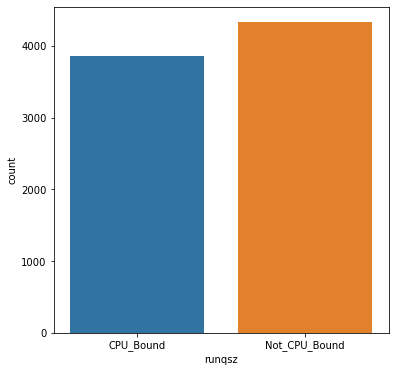

In [9]:
plt.figure(figsize=(6,6))
sns.countplot(data=df1, x='runqsz')

# Box plot

A box and whisker plot, often known as a box plot, shows a five-number summary of a collection of data. The lowest, first quartile, median, third quartile, and maximum are the five-number summary. A box plot is created by drawing a box from the first to third quartiles. Box plots are used to depict the distributions of numerical data values, particularly when comparing them across various groups. They are designed to deliver high-level information at a look while also providing general information about a group.

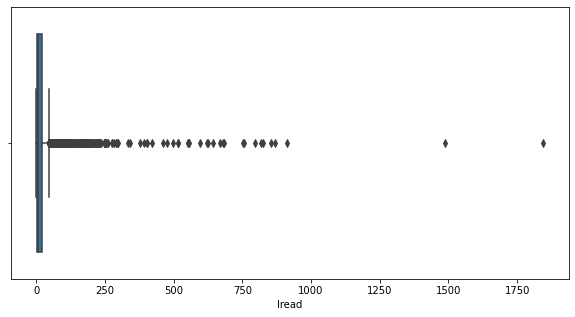

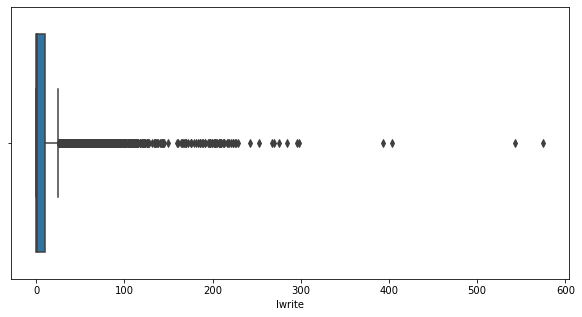

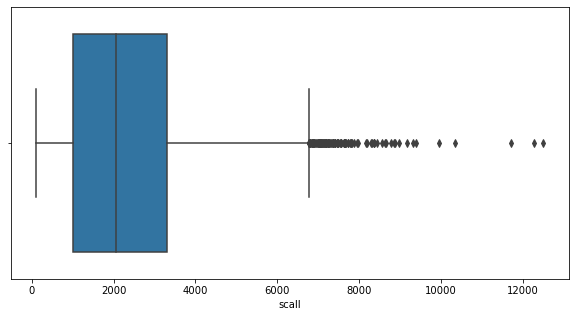

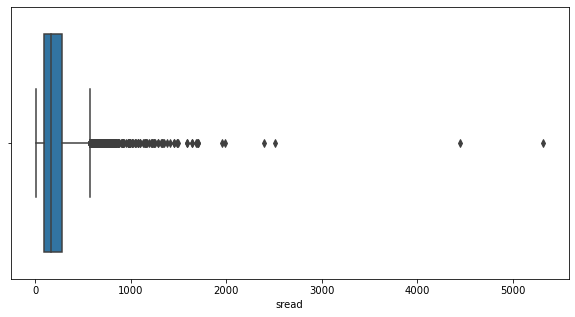

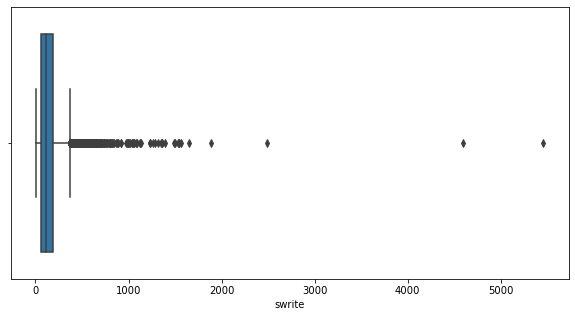

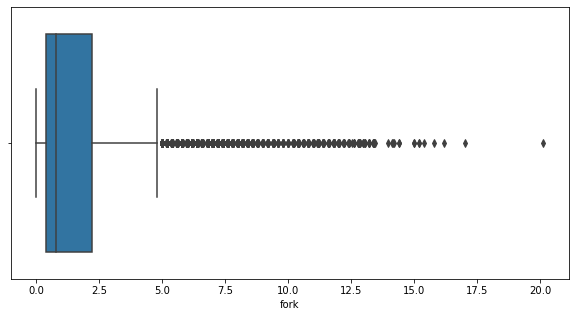

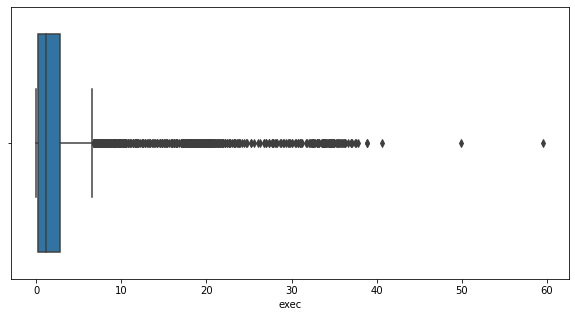

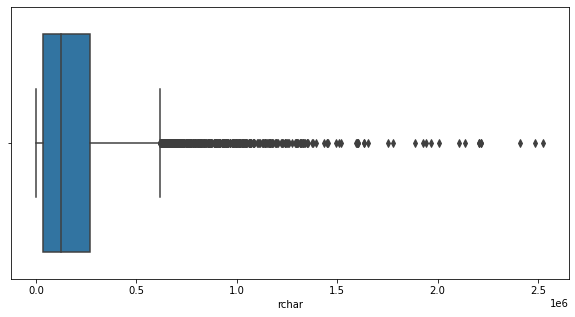

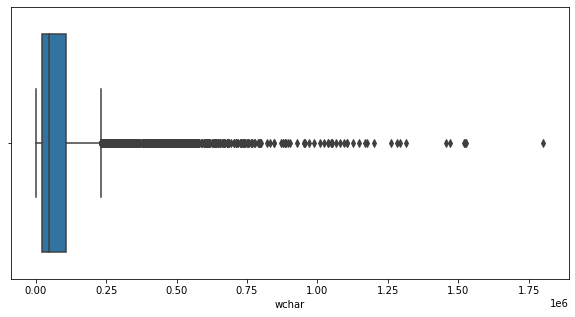

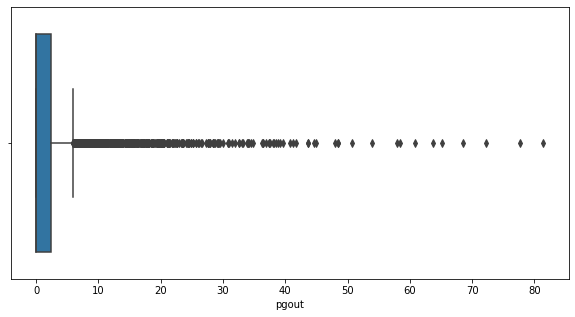

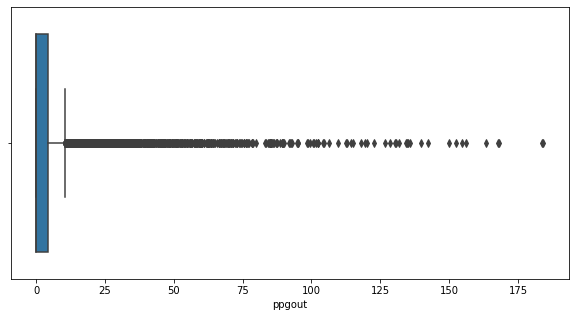

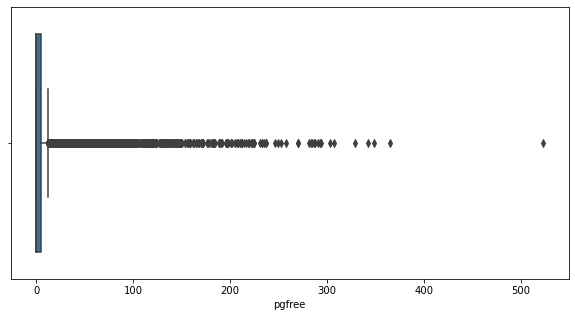

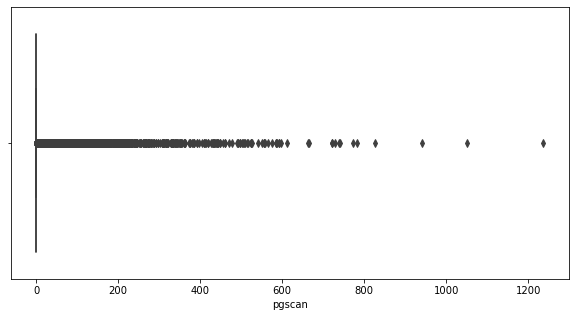

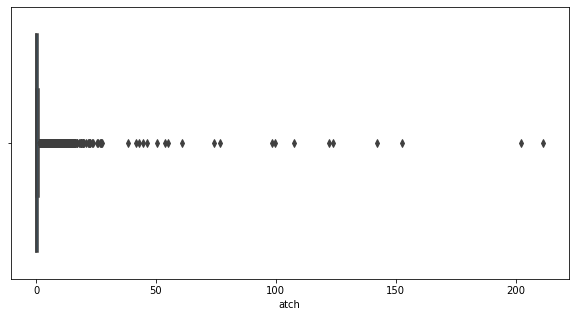

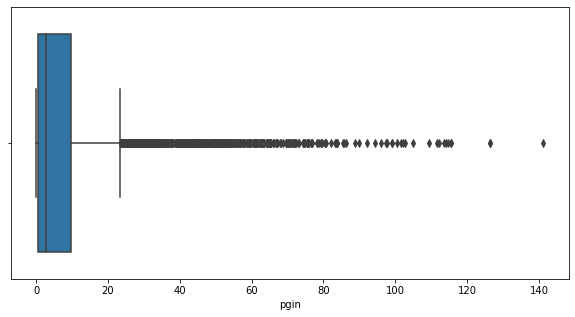

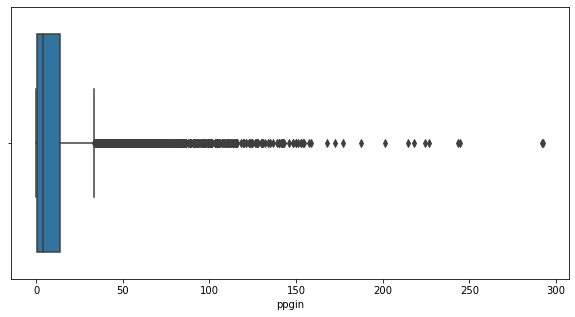

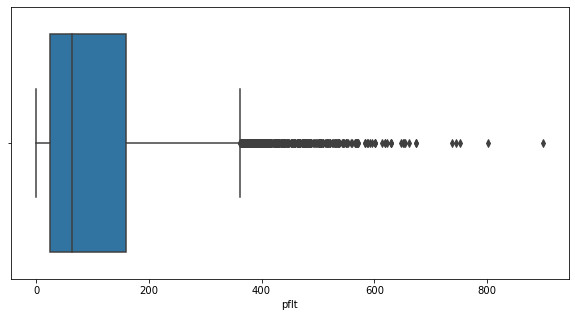

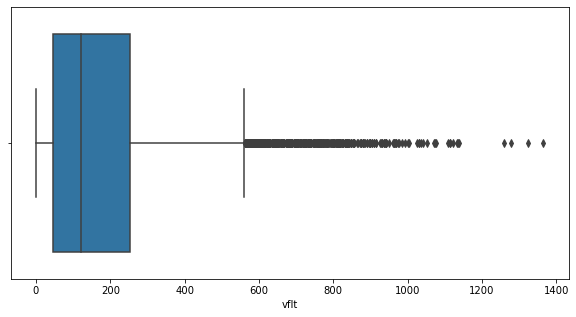

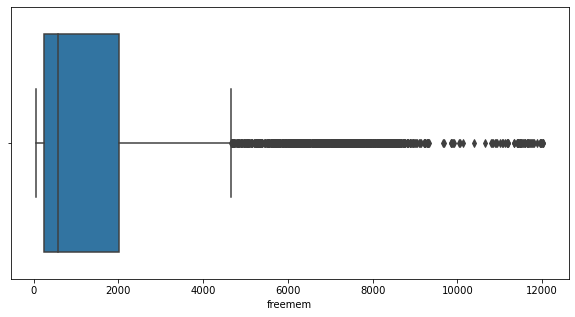

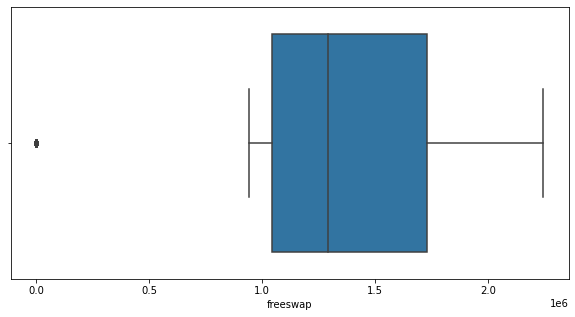

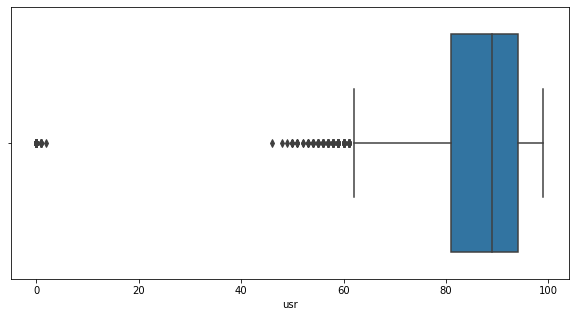

In [10]:
lstnumcols = list(df1.select_dtypes(exclude='object').columns)
for i in lstnumcols:
    sns.boxplot(df1[i])
    plt.show()

Utilizing the boxplot on the above dataframe, we can determine the outliers and establish that all columns, with the exception of freemem, contain outliers.

In [ ]:
sns.pairplot(data=df1)

NumExpr defaulting to 4 threads.


Pair plots are used to determine the most distinct clusters or the best combination of characteristics to describe a connection between two variables. By creating some straightforward linear separations or basic lines in our data set, it also helps to create some straightforward classification models.

The corr() function is a fantastic feature of the Pandas module. The connection between each column in your data collection is determined using the corr() technique.

In [ ]:
cor = df1.corr()
cor

In [ ]:
plt.figure(figsize=(12,8))

sns.heatmap(cor,annot=True,mask=np.triu(cor,+1),cmap='RdYlGn');

inferece from the above corelation heat map we can say the following 
fork is highly correlated with pfit, vfit, exec
sread,swrite is correlated with scall
pgfree , ppgout are highly correlated

# 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of creating new features if required. Also check for outliers and duplicates if there.

In [14]:
df1["rchar"].fillna(df1['rchar'].median(),inplace=True)

In [15]:
df1["wchar"].fillna(df1['wchar'].median(),inplace=True)

We utilise median since there are NO NULL values within it because the rchar and wchar both include NULL values.

In [16]:
df1.isna().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

In [17]:
df1.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap', 'usr'],
      dtype='object')

In [18]:
df1.isin([0]).sum()

lread        675
lwrite      2684
scall          0
sread          0
swrite         0
fork          21
exec          21
rchar          0
wchar          0
pgout       4878
ppgout      4878
pgfree      4869
pgscan      6448
atch        4575
pgin        1220
ppgin       1220
pflt           3
vflt           0
runqsz         0
freemem        0
freeswap       0
usr          283
dtype: int64

Using the isna the nullvaues of the dataset are identified. There are ZERO values present in the dataset as in the above function.

# 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [19]:
df1_dummy = pd.get_dummies(df1, drop_first=True)
df1_dummy.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,usr,runqsz_Not_CPU_Bound
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,4670,1730946,95,0
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,7278,1869002,97,1
2,15,3,2162,159,119,2.0,2.4,125473.5,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,702,1021237,87,1
3,0,0,160,12,16,0.2,0.2,125473.5,8670.0,0.0,...,0.0,0.0,0.2,0.2,15.60,16.80,7248,1863704,98,1
4,5,1,330,39,38,0.4,0.4,125473.5,12185.0,0.0,...,0.0,0.0,1.0,1.2,37.80,47.60,633,1760253,90,1


Dummy data, as used in informatics, is unimportant information that is used to fill space where genuine data should theoretically be present but does not really contain any relevant information. For both operational and testing purposes, dummy data can be utilised as a stand-in.

Data modification is performed with get dummies(). It creates dummy or indicator variables out of categorical data. Prefix=None, prefix sep=' ', dummy na=False, columns=None, sparse=False, drop first=False, dtype=None, pandas.get dummies Parameters: whose data has to be altered.

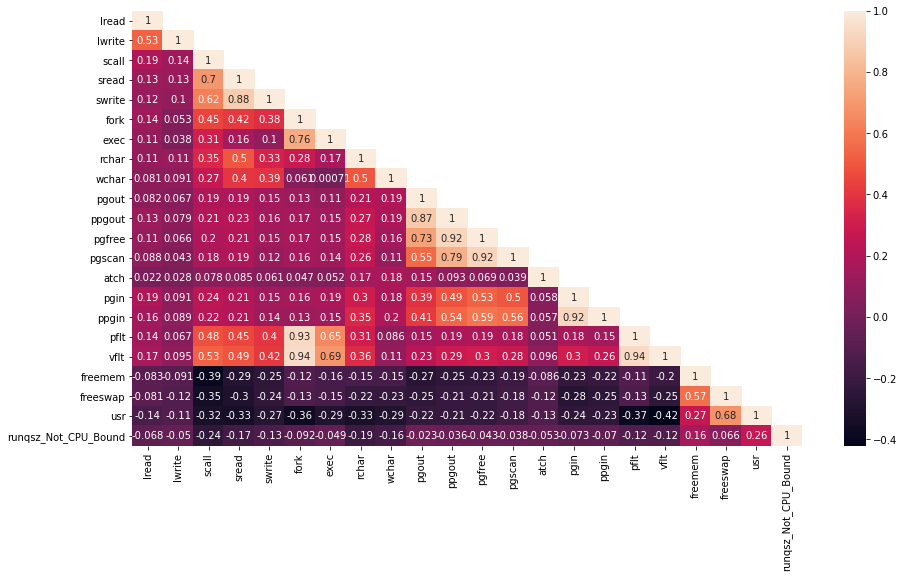

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(df1_dummy.corr(),annot=True,mask=np.triu(df1_dummy.corr(),+1))
plt.show()

Despite the addition of zeroes and null values, there is no significant difference between the original and dummy data frames.

In [21]:
import statsmodels.formula.api as SM

In [22]:
'+'.join(df1.columns)

'lread+lwrite+scall+sread+swrite+fork+exec+rchar+wchar+pgout+ppgout+pgfree+pgscan+atch+pgin+ppgin+pflt+vflt+runqsz+freemem+freeswap+usr'

In [23]:
formula_MLR_1 = 'usr~lread+lwrite+scall+sread+swrite+fork+exec+rchar+wchar+pgout+ppgout+pgfree+pgscan+atch+pgin+ppgin+pflt+vflt+freemem+freeswap+runqsz_Not_CPU_Bound'

In [24]:
model_MLR_1 = SM.ols(formula=formula_MLR_1,data=df1_dummy).fit()
model_MLR_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     692.0
Date:                Thu, 01 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:46:36   Log-Likelihood:                -31296.
No. Observations:                8192   AIC:                         6.264e+04
Df Residuals:                    8170   BIC:                         6.279e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               42.8406      0.623     68.749      0.000      41.619      44.062
lread                   -0.0198      0.003     -7.088      0.000      -0.025      -0.014
lwrite                   0.0074      0.005      1.522      0.128      -0.002       0.017
scall                    0.0010      0.000      8.759      0.000       0.001       0.001
sread                -9.749e-05      0.002     -0.061      0.952      -0.003       0.003
swrite                  -0.0016      0.002     -0.889      0.374      -0.005       0.002
fork                    -1.8871      0.209     -9.039      0.000      -2.296      -1.478
exec                    -0.0416      0.041     -1.013      0.311      -0.122       0.039
rchar                -3.657e-06   7.19e-07     -5.084      0.000   -5.07e-06   -2.25e-06
wchar                -1.066e-05    1.1e-06     -9.731      0.000   -1.28e-05   -8.51e-06
pgout                   -0.2048      0.054     -3.799      0.000      -0.310      -0.099
ppgout                   0.1270      0.031      4.109      0.000       0.066       0.188
pgfree                  -0.0880      0.016     -5.553      0.000      -0.119      -0.057
pgscan                   0.0125      0.005      2.644      0.008       0.003       0.022
atch                    -0.0396      0.022     -1.773      0.076      -0.083       0.004
pgin                     0.0581      0.024      2.383      0.017       0.010       0.106
ppgin                   -0.0392      0.016     -2.507      0.012      -0.070      -0.009
pflt                    -0.0401      0.004    -11.182      0.000      -0.047      -0.033
vflt                     0.0228      0.003      8.215      0.000       0.017       0.028
freemem                 -0.0017   6.37e-05    -26.141      0.000      -0.002      -0.002
freeswap              3.325e-05   3.82e-07     87.082      0.000    3.25e-05     3.4e-05
runqsz_Not_CPU_Bound     7.9475      0.258     30.828      0.000       7.442       8.453
==============================================================================
Omnibus:                     1928.707   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5359.778
Skew:                          -1.244   Prob(JB):                         0.00
Kurtosis:                       6.084   Cond. No.                     7.28e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=SM.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

The measure of multicollinearity in the collection of variables used in multiple regressions is the variance inflation factor. In general, a vif value greater than 10 denotes a high degree of correlation with the other independent variables.
To interpret and obtain values from dummy data, VIF computation is done at the column level as shown below.

In [26]:
print('For the first MLR model:','\n')

print('Rsquared',model_MLR_1.rsquared)
print('Adjusted Rsquared',model_MLR_1.rsquared_adj)

For the first MLR model: 

Rsquared 0.6401324193780404
Adjusted Rsquared 0.6392074231487797


In [27]:
vif_cal(input_data=df1_dummy[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar','pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']])

lread  VIF =  1.49
lwrite  VIF =  1.43
scall  VIF =  2.48
sread  VIF =  6.87
swrite  VIF =  5.4
fork  VIF =  17.97
exec  VIF =  3.07
rchar  VIF =  1.97
wchar  VIF =  1.59
pgout  VIF =  5.49
ppgout  VIF =  14.83
pgfree  VIF =  17.63
pgscan  VIF =  7.6
atch  VIF =  1.09
pgin  VIF =  7.66
ppgin  VIF =  8.14
pflt  VIF =  11.29
vflt  VIF =  18.83
freemem  VIF =  1.67
freeswap  VIF =  1.74
runqsz_Not_CPU_Bound  VIF =  1.11


for geting acurate models vflt  VIF =  18.83 has to be eliminated

# Model without the 'vflt' variable

In [28]:
formula_MLR_2 = 'usr~lread+lwrite+scall+sread+swrite+fork+exec+rchar+wchar+pgout+ppgout+pgfree+pgscan+atch+pgin+ppgin+pflt+freemem+freeswap+runqsz_Not_CPU_Bound'

In [29]:
model_MLR_2 = SM.ols(formula=formula_MLR_2,data=df1_dummy).fit()

In [30]:
print('For the second MLR model:','\n')

print('Rsquared',model_MLR_2.rsquared)
print('Adjusted Rsquared',model_MLR_2.rsquared_adj)

For the second MLR model: 

Rsquared 0.6371594972102304
Adjusted Rsquared 0.6362713794699544


After excluding the vflt variable from the dataset, the updayed MLR model will have Rsquard 0.637, Adjusted Rsquared 0.636

In [31]:
vif_cal(input_data=df1_dummy[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']])

lread  VIF =  1.49
lwrite  VIF =  1.43
scall  VIF =  2.43
sread  VIF =  6.82
swrite  VIF =  5.36
fork  VIF =  12.29
exec  VIF =  3.06
rchar  VIF =  1.96
wchar  VIF =  1.58
pgout  VIF =  5.48
ppgout  VIF =  14.83
pgfree  VIF =  17.43
pgscan  VIF =  7.6
atch  VIF =  1.07
pgin  VIF =  7.25
ppgin  VIF =  8.02
pflt  VIF =  8.72
freemem  VIF =  1.67
freeswap  VIF =  1.65
runqsz_Not_CPU_Bound  VIF =  1.11


for geting acurate models pgfree  VIF =  17.43 has to be eliminated

# Model without the 'pgfree' variable

In [32]:
formula_MLR_3 = 'usr~lread+lwrite+scall+sread+swrite+fork+exec+rchar+wchar+pgout+ppgout+pgscan+atch+pgin+ppgin+pflt+freemem+freeswap+runqsz_Not_CPU_Bound'

In [33]:
model_MLR_3 = SM.ols(formula=formula_MLR_3,data=df1_dummy).fit()

In [34]:
print('For the third MLR model:','\n')

print('Rsquared',model_MLR_3.rsquared)
print('Adjusted Rsquared',model_MLR_3.rsquared_adj)

For the third MLR model: 

Rsquared 0.6361874949460651
Adjusted Rsquared 0.635341626419875


After excluding the pgfree variable from the dataset, the updayed MLR model will have Rsquard 0.637, Adjusted Rsquared 0.636

In [35]:
vif_cal(input_data=df1_dummy[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']])

lread  VIF =  1.49
lwrite  VIF =  1.43
scall  VIF =  2.43
sread  VIF =  6.8
swrite  VIF =  5.35
fork  VIF =  12.29
exec  VIF =  3.05
rchar  VIF =  1.96
wchar  VIF =  1.58
pgout  VIF =  5.47
ppgout  VIF =  9.8
pgscan  VIF =  3.46
atch  VIF =  1.07
pgin  VIF =  7.24
ppgin  VIF =  8.01
pflt  VIF =  8.71
freemem  VIF =  1.67
freeswap  VIF =  1.65
runqsz_Not_CPU_Bound  VIF =  1.11


for geting acurate models fork  VIF =  12.29 has to be eliminated

# Model without the 'fork' variable

In [36]:
formula_MLR_4 = 'usr~lread+lwrite+scall+sread+swrite+exec+rchar+wchar+pgout+ppgout+pgscan+atch+pgin+ppgin+pflt+freemem+freeswap+runqsz_Not_CPU_Bound'

In [37]:
model_MLR_4 = SM.ols(formula=formula_MLR_4,data=df1_dummy).fit()

In [38]:
print('For the fourth MLR model:','\n')

print('Rsquared',model_MLR_4.rsquared)
print('Adjusted Rsquared',model_MLR_4.rsquared_adj)

For the fourth MLR model: 

Rsquared 0.6349424162152141
Adjusted Rsquared 0.6341384230048719


After excluding the pgfree variable from the dataset, the updayed MLR model will have Rsquard 0.6349, Adjusted Rsquared 0.6341

In [39]:
vif_cal(input_data=df1_dummy[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']])

lread  VIF =  1.49
lwrite  VIF =  1.42
scall  VIF =  2.41
sread  VIF =  6.79
swrite  VIF =  5.2
exec  VIF =  1.9
rchar  VIF =  1.96
wchar  VIF =  1.57
pgout  VIF =  5.47
ppgout  VIF =  9.8
pgscan  VIF =  3.46
atch  VIF =  1.07
pgin  VIF =  7.24
ppgin  VIF =  8.01
pflt  VIF =  2.36
freemem  VIF =  1.67
freeswap  VIF =  1.65
runqsz_Not_CPU_Bound  VIF =  1.11


for geting acurate models pgout  VIF =  5.47 has to be eliminated

# Model without the 'ppgout' variable

In [40]:
formula_MLR_5 = 'usr~lread+lwrite+scall+sread+swrite+exec+rchar+wchar+pgout+pgscan+atch+pgin+ppgin+pflt+freemem+freeswap+runqsz_Not_CPU_Bound'

In [41]:
model_MLR_5 = SM.ols(formula=formula_MLR_5,data=df1_dummy).fit()

In [42]:
print('For the fifth MLR model:','\n')

print('Rsquared',model_MLR_5.rsquared)
print('Adjusted Rsquared',model_MLR_5.rsquared_adj)

For the fifth MLR model: 

Rsquared 0.6348347241300614
Adjusted Rsquared 0.6340752661303319


In [43]:
vif_cal(input_data=df1_dummy[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'exec', 'rchar',
       'wchar', 'pgout', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']])

lread  VIF =  1.47
lwrite  VIF =  1.42
scall  VIF =  2.41
sread  VIF =  6.77
swrite  VIF =  5.19
exec  VIF =  1.9
rchar  VIF =  1.96
wchar  VIF =  1.57
pgout  VIF =  1.58
pgscan  VIF =  1.86
atch  VIF =  1.07
pgin  VIF =  7.23
ppgin  VIF =  7.95
pflt  VIF =  2.36
freemem  VIF =  1.67
freeswap  VIF =  1.64
runqsz_Not_CPU_Bound  VIF =  1.11


for geting acurate models ppgin  VIF =  7.95 has to be eliminated

# Model without the 'ppgin' variable

In [44]:
formula_MLR_6 = 'usr~lread+lwrite+scall+sread+swrite+exec+rchar+wchar+pgout+pgscan+atch+pgin+pflt+freemem+freeswap+runqsz_Not_CPU_Bound'

In [45]:
model_MLR_6 = SM.ols(formula=formula_MLR_6,data=df1_dummy).fit()

In [46]:
print('For the sixth MLR model:','\n')

print('Rsquared',model_MLR_6.rsquared)
print('Adjusted Rsquared',model_MLR_6.rsquared_adj)

For the sixth MLR model: 

Rsquared 0.6343388612251305
Adjusted Rsquared 0.6336231941645314


In [47]:
vif_cal(input_data=df1_dummy[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'exec', 'rchar',
       'wchar', 'pgout', 'pgscan', 'atch', 'pgin',
       'pflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']])

lread  VIF =  1.47
lwrite  VIF =  1.42
scall  VIF =  2.41
sread  VIF =  6.77
swrite  VIF =  5.19
exec  VIF =  1.9
rchar  VIF =  1.91
wchar  VIF =  1.57
pgout  VIF =  1.58
pgscan  VIF =  1.72
atch  VIF =  1.07
pgin  VIF =  1.51
pflt  VIF =  2.36
freemem  VIF =  1.67
freeswap  VIF =  1.64
runqsz_Not_CPU_Bound  VIF =  1.11


for geting acurate models sread  VIF =  6.77 has to be eliminated

# Model without the 'sread' variable

In [48]:
formula_MLR_7 = 'usr~lread+lwrite+scall+swrite+exec+rchar+wchar+pgout+pgscan+atch+pgin+pflt+freemem+freeswap+runqsz_Not_CPU_Bound'

In [49]:
model_MLR_7 = SM.ols(formula=formula_MLR_7,data=df1_dummy).fit()

In [50]:
model_MLR_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     945.3
Date:                Thu, 01 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:47:35   Log-Likelihood:                -31362.
No. Observations:                8192   AIC:                         6.276e+04
Df Residuals:                    8176   BIC:                         6.287e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               44.2090      0.605     73.067      0.000      43.023      45.395
lread                   -0.0205      0.003     -7.350      0.000      -0.026      -0.015
lwrite                   0.0109      0.005      2.214      0.027       0.001       0.020
scall                    0.0013      0.000     11.398      0.000       0.001       0.001
swrite                  -0.0033      0.001     -3.109      0.002      -0.005      -0.001
exec                    -0.1862      0.032     -5.734      0.000      -0.250      -0.123
rchar                 -3.47e-06   6.55e-07     -5.296      0.000   -4.75e-06   -2.19e-06
wchar                -1.103e-05   1.09e-06    -10.084      0.000   -1.32e-05   -8.88e-06
pgout                   -0.1388      0.029     -4.755      0.000      -0.196      -0.082
pgscan                  -0.0025      0.002     -1.092      0.275      -0.007       0.002
atch                    -0.0163      0.022     -0.732      0.464      -0.060       0.027
pgin                     0.0266      0.011      2.439      0.015       0.005       0.048
pflt                    -0.0404      0.002    -24.541      0.000      -0.044      -0.037
freemem                 -0.0017   6.41e-05    -25.837      0.000      -0.002      -0.002
freeswap              3.251e-05   3.72e-07     87.368      0.000    3.18e-05    3.32e-05
runqsz_Not_CPU_Bound     7.9460      0.260     30.595      0.000       7.437       8.455
==============================================================================
Omnibus:                     2002.518   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5708.152
Skew:                          -1.281   Prob(JB):                         0.00
Kurtosis:                       6.187   Cond. No.                     7.01e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
print('For the seventh MLR model:','\n')

print('Rsquared',model_MLR_7.rsquared)
print('Adjusted Rsquared',model_MLR_7.rsquared_adj)

For the seventh MLR model: 

Rsquared 0.6342749803148436
Adjusted Rsquared 0.6336040073090612


In [52]:
vif_cal(input_data=df1_dummy[['lread', 'lwrite', 'scall', 'swrite', 'exec', 'rchar',
       'wchar', 'pgout', 'pgscan', 'atch', 'pgin',
       'pflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']])

lread  VIF =  1.47
lwrite  VIF =  1.42
scall  VIF =  2.18
swrite  VIF =  1.97
exec  VIF =  1.89
rchar  VIF =  1.61
wchar  VIF =  1.56
pgout  VIF =  1.58
pgscan  VIF =  1.71
atch  VIF =  1.07
pgin  VIF =  1.51
pflt  VIF =  2.34
freemem  VIF =  1.67
freeswap  VIF =  1.63
runqsz_Not_CPU_Bound  VIF =  1.11


for geting acurate models atch  VIF =  1.07 has to be eliminated

# Model without the 'atch' variable

In [53]:
formula_MLR_8 = 'usr~lread+lwrite+scall+swrite+exec+rchar+wchar+pgout+pgscan+pgin+pflt+freemem+freeswap+runqsz_Not_CPU_Bound'

In [54]:
model_MLR_8 = SM.ols(formula=formula_MLR_8,data=df1_dummy).fit()
model_MLR_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     1013.
Date:                Thu, 01 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:47:41   Log-Likelihood:                -31362.
No. Observations:                8192   AIC:                         6.275e+04
Df Residuals:                    8177   BIC:                         6.286e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               44.1841      0.604     73.144      0.000      43.000      45.368
lread                   -0.0205      0.003     -7.349      0.000      -0.026      -0.015
lwrite                   0.0109      0.005      2.215      0.027       0.001       0.020
scall                    0.0013      0.000     11.401      0.000       0.001       0.001
swrite                  -0.0033      0.001     -3.088      0.002      -0.005      -0.001
exec                    -0.1869      0.032     -5.756      0.000      -0.251      -0.123
rchar                 -3.51e-06   6.53e-07     -5.375      0.000   -4.79e-06   -2.23e-06
wchar                -1.111e-05   1.09e-06    -10.204      0.000   -1.32e-05   -8.97e-06
pgout                   -0.1413      0.029     -4.877      0.000      -0.198      -0.085
pgscan                  -0.0024      0.002     -1.050      0.294      -0.007       0.002
pgin                     0.0267      0.011      2.457      0.014       0.005       0.048
pflt                    -0.0404      0.002    -24.538      0.000      -0.044      -0.037
freemem                 -0.0017   6.41e-05    -25.835      0.000      -0.002      -0.002
freeswap              3.253e-05   3.72e-07     87.520      0.000    3.18e-05    3.33e-05
runqsz_Not_CPU_Bound     7.9491      0.260     30.612      0.000       7.440       8.458
==============================================================================
Omnibus:                     2003.374   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5705.889
Skew:                          -1.282   Prob(JB):                         0.00
Kurtosis:                       6.185   Cond. No.                     7.00e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  7e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model without the 'pgscan' variable

In [55]:
formula_MLR_9 = 'usr~lread+lwrite+scall+swrite+exec+rchar+wchar+pgout+pgin+pflt+freemem+freeswap+runqsz_Not_CPU_Bound'

In [56]:
model_MLR_9 = SM.ols(formula=formula_MLR_9,data=df1_dummy).fit()
model_MLR_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     1091.
Date:                Thu, 01 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:47:43   Log-Likelihood:                -31363.
No. Observations:                8192   AIC:                         6.275e+04
Df Residuals:                    8178   BIC:                         6.285e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               44.2213      0.603     73.331      0.000      43.039      45.403
lread                   -0.0205      0.003     -7.341      0.000      -0.026      -0.015
lwrite                   0.0110      0.005      2.233      0.026       0.001       0.021
scall                    0.0013      0.000     11.410      0.000       0.001       0.001
swrite                  -0.0033      0.001     -3.084      0.002      -0.005      -0.001
exec                    -0.1869      0.032     -5.755      0.000      -0.251      -0.123
rchar                -3.588e-06   6.49e-07     -5.530      0.000   -4.86e-06   -2.32e-06
wchar                -1.102e-05   1.09e-06    -10.154      0.000   -1.31e-05   -8.89e-06
pgout                   -0.1547      0.026     -5.951      0.000      -0.206      -0.104
pgin                     0.0229      0.010      2.234      0.026       0.003       0.043
pflt                    -0.0405      0.002    -24.593      0.000      -0.044      -0.037
freemem                 -0.0017   6.41e-05    -25.818      0.000      -0.002      -0.002
freeswap              3.251e-05   3.71e-07     87.535      0.000    3.18e-05    3.32e-05
runqsz_Not_CPU_Bound     7.9468      0.260     30.604      0.000       7.438       8.456
==============================================================================
Omnibus:                     2001.691   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5698.640
Skew:                          -1.281   Prob(JB):                         0.00
Kurtosis:                       6.183   Cond. No.                     6.99e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.99e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Predict using model 9

In [57]:
model_MLR_9_pred = model_MLR_9.fittedvalues
model_MLR_9_pred

0        93.860133
1       100.271572
2        79.094155
3        99.706985
4       106.388688
           ...    
8187     68.938536
8188     80.947225
8189     82.356869
8190     78.814911
8191     96.120962
Length: 8192, dtype: float64

# Target variable-predicted value plot

The target variable of a dataset is the feature of a dataset about which you want to gain a deeper understanding. A Linear regression algoritham uses historical data to learn patterns and uncover relationships between other features of your dataset and the target.

predictor plot is used to determine whether or not another predictor should be added to the model.

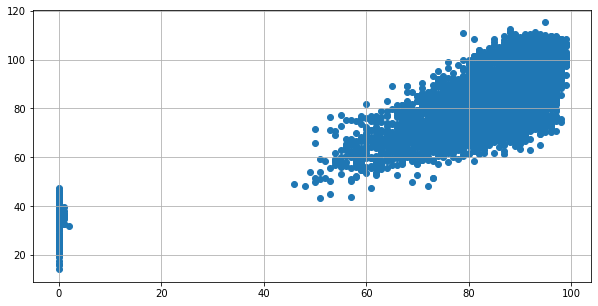

In [58]:
plt.scatter(df1_dummy['usr'],model_MLR_9_pred)
plt.grid();

# Actual vs predicted(blue is predicted, ornage is actual)

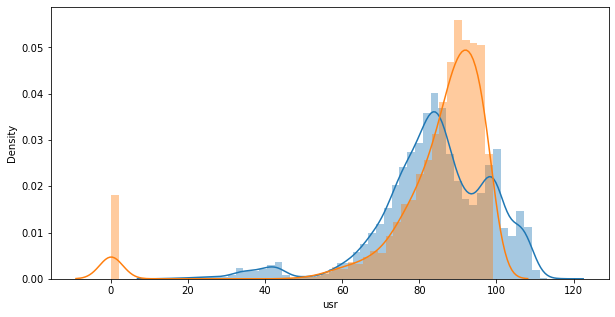

In [59]:
sns.distplot(model_MLR_9.fittedvalues)
sns.distplot(df1_dummy['usr']);

From the above dist plot we can say that the the actual values are higher than the pridective model 

# Error plot

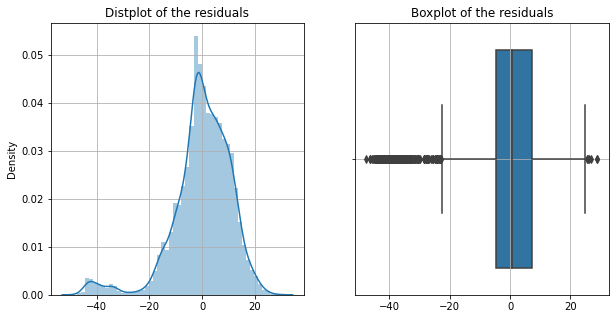

In [60]:
f,a =  plt.subplots(1,2,sharex=False,sharey=False,squeeze=False)


plot_0 = sns.distplot(model_MLR_9.resid,ax=a[0][0])
a[0][0].set_title('Distplot of the residuals')
a[0][0].grid()

plot_1 = sns.boxplot(model_MLR_9.resid,orient='v',ax=a[0][1])
a[0][1].set_title('Boxplot of the residuals')
a[0][1].grid()
plot_1;

Error plots are used to visually indicate uncertainty in data points. This is done by specifying both a min and and max value for each data point.

# Prediction by using sklearn

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
lr = LinearRegression()

In [63]:
X = df1_dummy[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']].copy()
Y = df1_dummy['usr']

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=123)

In [66]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(5734, 21)
(2458, 21)
(5734,)
(2458,)


In [67]:
model_9 = lr.fit(X_train[['lread', 'lwrite', 'scall', 'swrite', 'exec', 'rchar',
       'wchar', 'pgout', 'pgin',
       'pflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']],Y_train)

A training set is a portion of a data set used to fit (train) a model for prediction or classification of values that are known in the training set, but unknown in other (future) data. The training set is used in conjunction with validation and/or test sets that are used to evaluate different models.

# Training Data Prediction

In [68]:


model_9_pred_train = model_9.predict(X_train[['lread', 'lwrite', 'scall', 'swrite', 'exec', 'rchar',
       'wchar', 'pgout', 'pgin',
       'pflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']])
print(model_9_pred_train)

[100.74287235  51.29984145  88.74891913 ...  91.2389882   71.42815401
  99.87793966]


Predictive Test Selection is a new approach to Test Impact Analysis that uses machine learning to dynamically select which tests to run based on the characteristics of a code change. To achieve this, historic test results and information about the changes that were tested are used to train a machine learning model.

# Test Data Prediction

In [69]:
model_9_pred_test = model_9.predict(X_test[['lread', 'lwrite', 'scall', 'swrite', 'exec', 'rchar',
       'wchar', 'pgout', 'pgin',
       'pflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']])
print(model_9_pred_test)

[82.6120278  81.44032741 96.94898961 ... 90.17362482 69.92562428
 78.19120034]


# RMSE check for all the model built

Root mean square error or root mean square deviation is one of the most commonly used measures for evaluating the quality of predictions. It shows how far predictions fall from measured true values using Euclidean distance.

In [70]:
from sklearn.metrics import mean_squared_error

In [71]:
print('Training Data RMSE of model_9:',mean_squared_error(Y_train,model_9_pred_train,squared=False))
print('Test Data RMSE of model_9:',mean_squared_error(Y_test,model_9_pred_test,squared=False))

Training Data RMSE of model_9: 11.32873810061817
Test Data RMSE of model_9: 10.691490868421171


# Scatteplot for the predictions

# Training Data

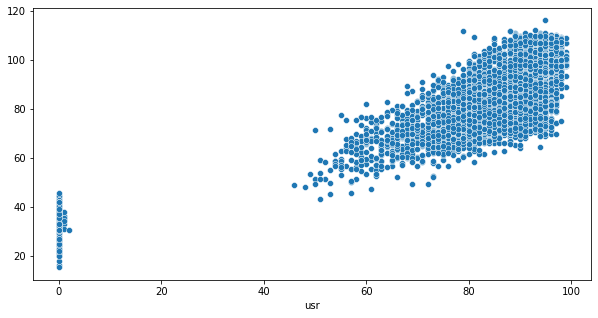

In [72]:
sns.scatterplot(Y_train,model_9_pred_train);

# Test Data

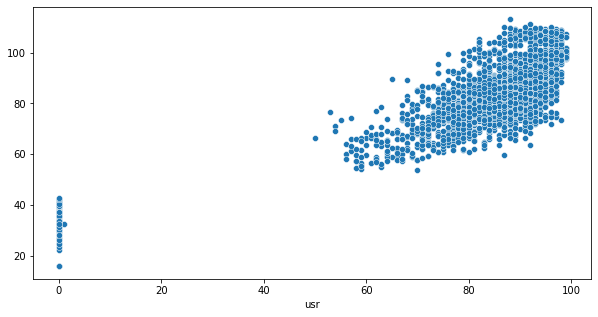

In [73]:
sns.scatterplot(Y_test,model_9_pred_test);

# 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.
# Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

The target variable 'usr' is depend upon the variables used in model 9 i.e.
formula_MLR_9 = 'usr~lread+lwrite+scall+swrite+exec+rchar+wchar+pgout+pgin+pflt+freemem+freeswap+runqsz_Not_CPU_Bound'

usr = (44.22) - (lread x 0.0205) + (lwrite x 0.011) + (scall x 0.0013) - (swrite x 0.0033) - (exec x 0.1869) - (rchar x 3.588e-06) - (wchar x 1.102e-05) - (pgout x 0.1547) + (pgin x 0.0229) - (pflt x 0.0405) - (freemem x 0.0017) + (freeswap x 3.251e-05) + (runqsz_Not_CPU_Bound x 7.9468)



This means:

•	Addition of lread increases usr decreases by 0.0205 units.

•	Addition of lwrite increases usr increases by 0.011 units.

•	 Addition of scall increases usr increases by 0.0013 units.

•	Addition of swrite increases usr decreases by 0.0033 units.

•	Addition of exec increases usr decreases by 0.1869 units.

•	Addition of rchar increases usr decreases by 3.588e-06 units.

•	Addition of wchar increases usr decreases by 1.102e-05 units.

•	Addition of pgout increases usr decreases by 0.1547 units

•	Addition of pgin increases usr increases by 0.0229 units.

•	Addition of pflt increases usr decreases by 0.0405 units.

•	Addition of freemem increases usr decreases by 0.0017 units.

•	Addition of freeswap increases usr increases by 3.251e-05 units.

Addition of runqsz_Not_CPU_Bound increases usr increases by 7.9468 units.